# **Name:Reyad Hasan Rinkon**
#**Registration:2017331034**

First, downloading and installing  some Packages in Python.With the help of those libraries and packages we will be able to plot and view these data in many ways

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.set(style="darkgrid")
import statistics as stat
import plotly.express as px

Now we are going to upload the file we are going to analyze





In [19]:
spotify= pd.read_csv("top-50.csv", encoding="ISO-8859-1")
spotify.head()

,Track Name,Artist Name,Genre,Beats Per Minute,Energy,Danceability,Loudness (dB),Popularity
0,Se¤orita,Shawn Mendes,canadian pop,117,55,76,-6,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,94


In [21]:
spotify.shape


(50, 8)

#**Describing Dataset**
So this data has 50 rows and 8 columns.Supporting 50 songs with 8 of their attributes naming 
1.Track Name 
2.Artist Name 
3.Genre 
4.Beats Per Minute 
5.Energy 
6.Dancebility 
7.Loudness 
8.Popularity

Now lets check if there is any missing value we must process





In [22]:
spotify.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track Name        50 non-null     object
 1   Artist Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats Per Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness (dB)     50 non-null     int64 
 7   Popularity        50 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.2+ KB


No There is no missing value so we neednt to add or subtract anything from dataset

In [23]:
spotify_int = spotify.iloc[:, 4:14]
spotify_int.head()

,Energy,Danceability,Loudness (dB),Popularity
0,55,76,-6,79
1,81,79,-4,92
2,80,40,-4,85
3,65,64,-8,86
4,65,58,-4,94


#**Counting central Tendencies and Statistical analysis**

Here using library function we are analyzing and counting **Mean,Standard Daviation,Minimum,Maximum** etc.

In [24]:
spotify_int.describe()


,Energy,Danceability,Loudness (dB),Popularity
count,50.000000,50.00000,50.000000,50.000000
mean,64.060000,71.38000,-5.660000,87.500000
std,14.231913,11.92988,2.056448,4.491489
min,32.000000,29.00000,-11.000000,70.000000
25%,55.250000,67.00000,-6.750000,86.000000
50%,66.500000,73.50000,-6.000000,88.000000
75%,74.750000,79.75000,-4.000000,90.750000
max,88.000000,90.00000,-2.000000,95.000000


#**Finding reations**
**in numerical values**

We have plotted eatch numarical value to every other numarical value.That gave us 3!+4=16 graphs. 

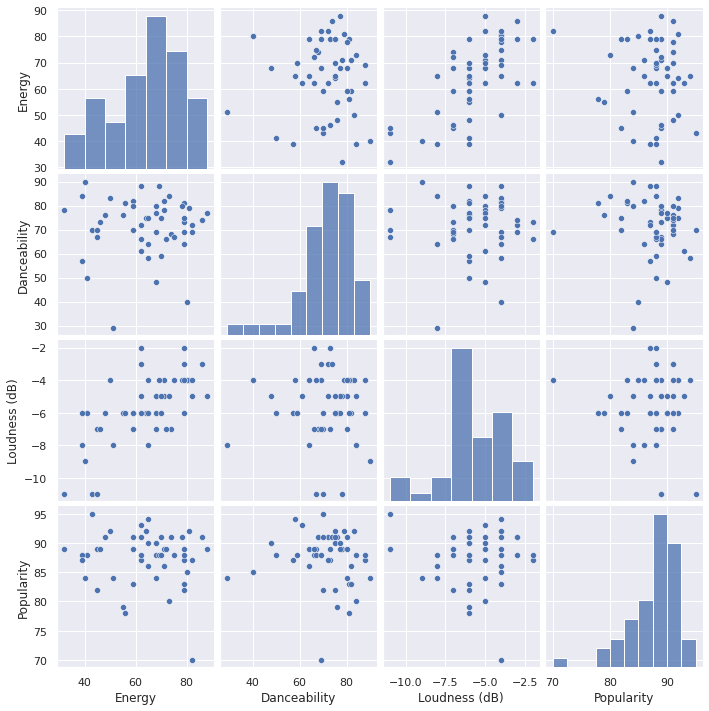

In [25]:
sns.pairplot(spotify_int);


#**Popularity and Track Name**


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 130 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 130 missing from current font.



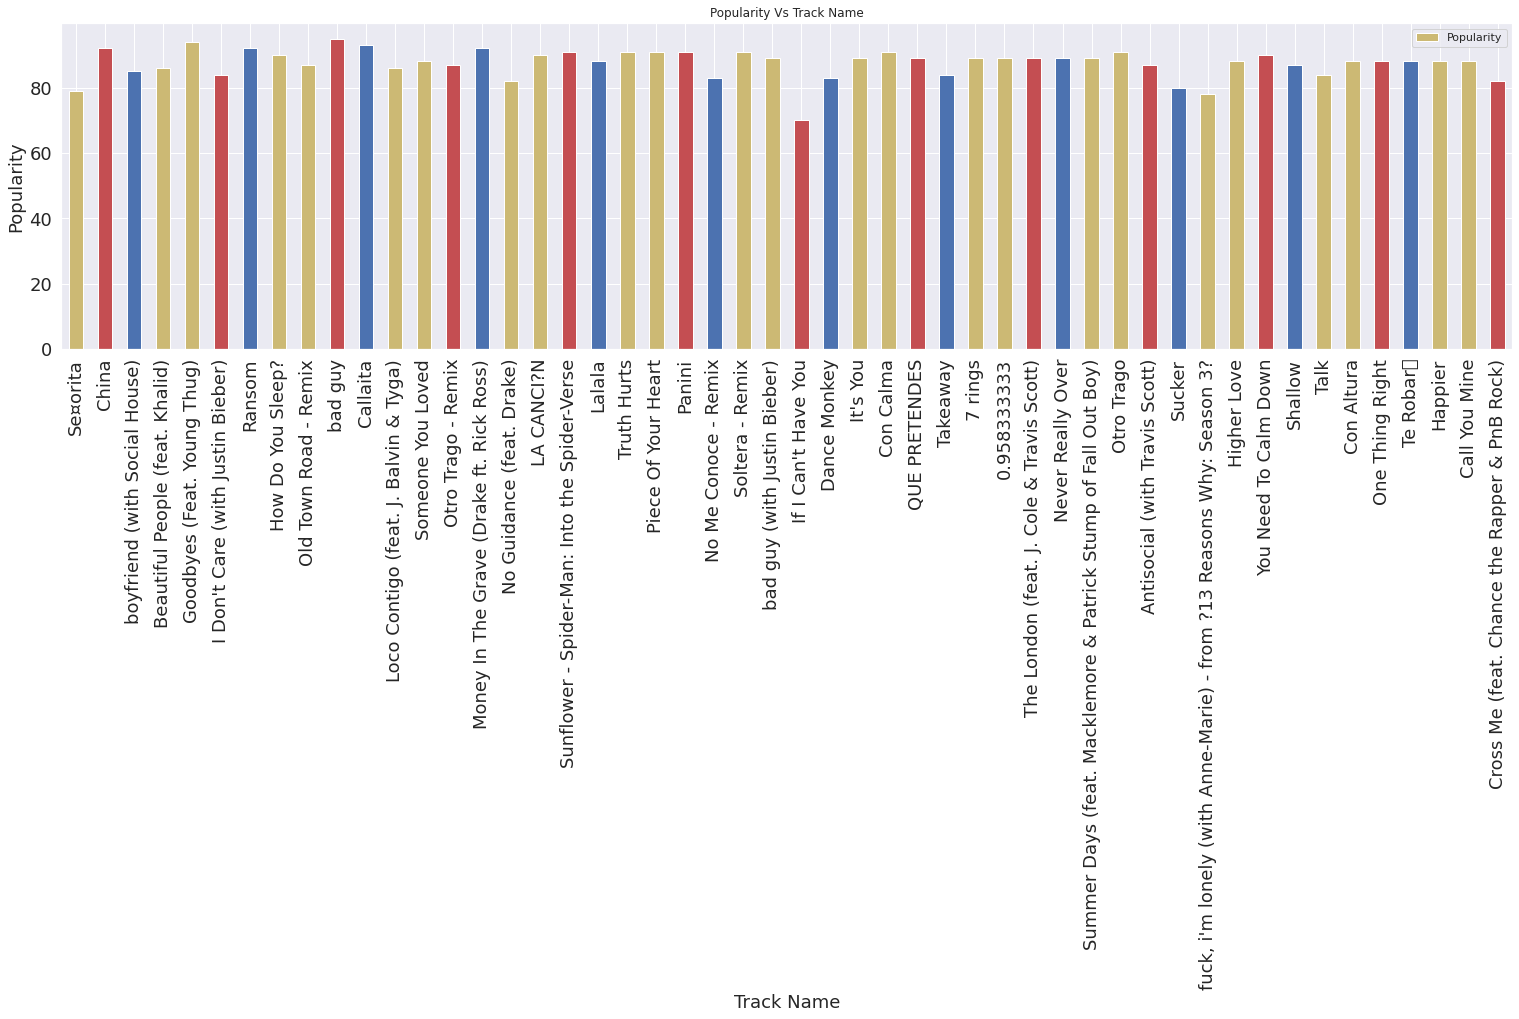

In [28]:
spotify.plot(y='Popularity',x= 'Track Name',kind='bar',figsize=(26,6),legend =True,title="Popularity Vs Track Name",
        fontsize=18,stacked=True,color=['y', 'r', 'b','y'])
plt.ylabel('Popularity', fontsize=18)
plt.xlabel('Track Name', fontsize=18)
plt.show()

#**Artists with most songs in the list**

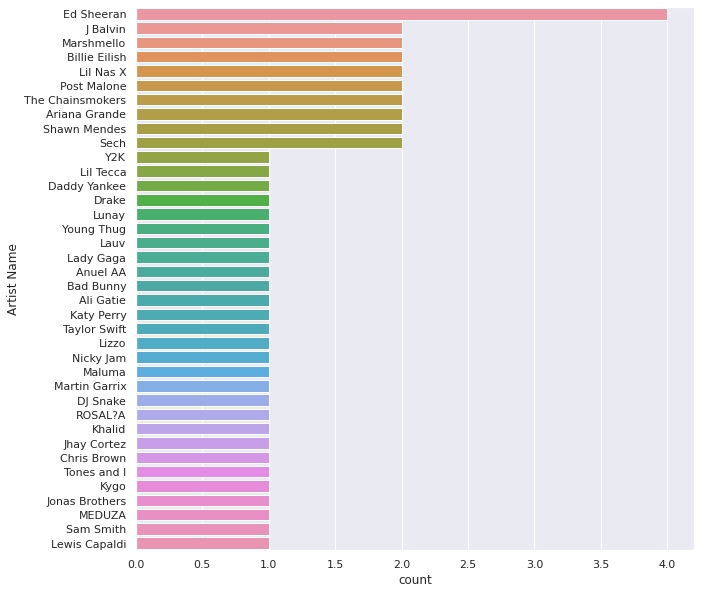

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(y='Artist Name', data=spotify, order=spotify["Artist Name"].value_counts().index)
plt.show()

#**Genre Vs Quantity**

Are some Genre usually more popular among the listeners? or every genre gets equal chance? By plotting this graph we are clearly seeing that some genre naming "Dance pop" "pop" "Latin" "Edm" and "Canadian pop" are more in numbers among our dataset

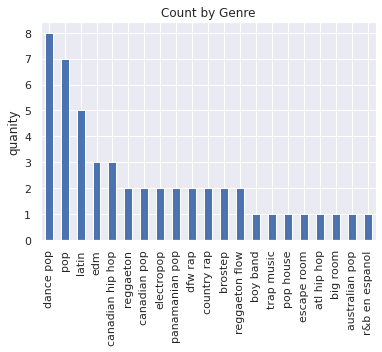

In [30]:
spotify['Genre'].value_counts().plot.bar()
plt.title('Count by Genre')
plt.ylabel('quanity')
plt.show()

In [31]:
print(spotify.groupby('Genre').size())


Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


#**Making a data cloud**


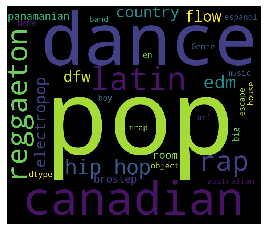

In [53]:
from wordcloud import WordCloud, STOPWORDS
# Create the wordcloud object
wordcloud = WordCloud(width=700, height=600, margin=3).generate(str(spotify.Genre))
# Display the generated image:
plt.imshow(wordcloud, interpolation='none')
plt.axis("off")
plt.show()

#**Genre and popularity**

Is some Genre songs are usually more popular then other?

Text(0.5, 1.0, 'Relationship between Genre & Popularity')

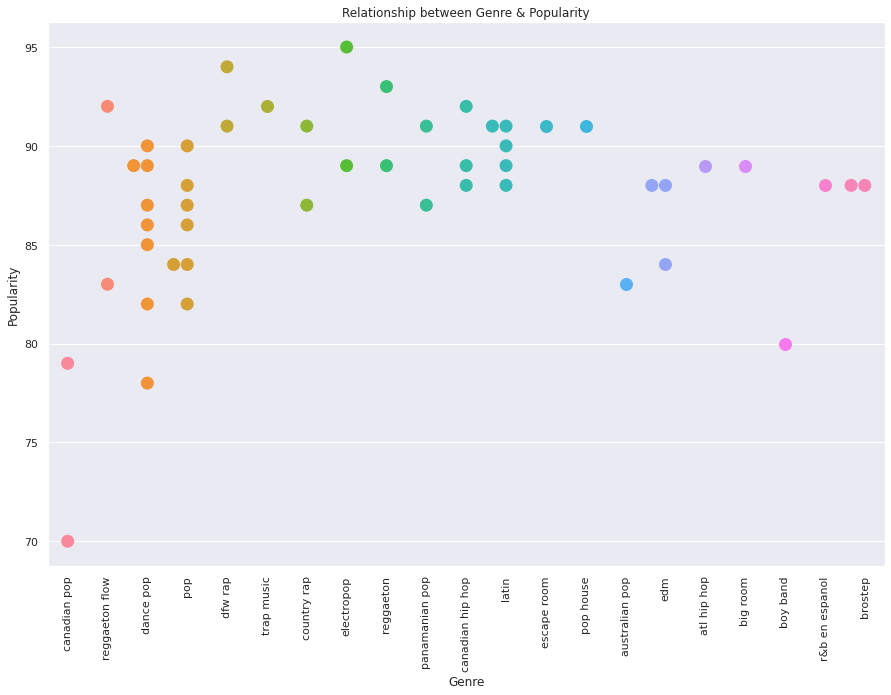

In [37]:
plt.figure(figsize=(15,10))
swarmplot=sns.swarmplot(x="Genre",y="Popularity",data=spotify, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity")

#**Loudness and energy are related?**



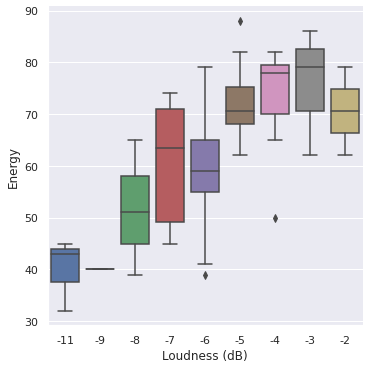

In [47]:
sns.catplot(x = "Loudness (dB)", y = "Energy", kind = "box", data = spotify)

#**Corelations....**

In this table now we are seeing positive/negative corelations between the attributes.

In [49]:
pd.set_option('precision', 3)
corr = spotify.corr(method='spearman')
print(corr)

                  Beats Per Minute  Energy  ...  Loudness (dB)  Popularity
Beats Per Minute             1.000   0.012  ...          0.014       0.217
Energy                       0.012   1.000  ...          0.635      -0.044
Danceability                -0.092  -0.049  ...          0.009      -0.141
Loudness (dB)                0.014   0.635  ...          1.000       0.072
Popularity                   0.217  -0.044  ...          0.072       1.000

[5 rows x 5 columns]


# **Overall story**

In this dataset We have found the most popular artist is Ed Sheeran having 4 songs in top 50 songs and 9 other artists has 3(three) songs each beside their name.Dance pop genre has heighst songs(8) followed by pop songs(7).pop and dance pop genre songs are more popular than usual.Electro pop has only 2 songs on the list but both of them are very popular.Loudness and Energy are positively co-relared.The relation between popularity and danceability has negative corelation.It can be a fact that since spotify is a listining service,danceability has negative relation with popularity in this regard.Popularity attribute has the smallest Standard deviation(SD) among the dataset(in terms of percentage).Because all the 50 songs are top songs on spotify,popularity has small deviation.Danceability has the heighst range(61) while populariy has the lowest(25).In terms of loudness -6dB is the most common loudness followed by -4dB.